# Example of use of the map tool of RamPy

Everything is handle through an object "map". 

This object allows us to import a map file from a Horiba or Renishaw spectrometer (CSV format), then allows performing some data treatment. More will come in the future.

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import rampy
from rampy import maps
from rampy import peak_shapes
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Data import

This is a Renishaw map

In [2]:
# file name
file='./data/4338-NDC1-(31)_4X4.txt'

We create a map object providing the above file name (with relative path)

In [3]:
my_map = maps.map(file, spectrometer_type="renishaw")

This object has attributes that save the X, Y, Raman shift and intensities.

We can access them like my_map.X, my_map.Y, my_map.w, my_map.I

We can use that to make a first plot:

<IPython.core.display.Javascript object>


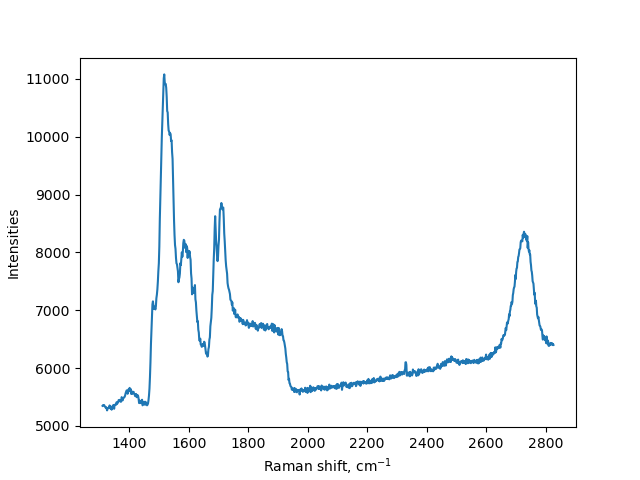

In [4]:
plt.figure()
plt.plot(my_map.w, my_map.I[:,1])
plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
plt.show()

# Remove background

In [5]:
bir = np.array([[1300,1350],[2000,2400],[2800,2850]])
my_map.background(bir, polynomial_order=2)

We make a nice figure to see the background

<IPython.core.display.Javascript object>


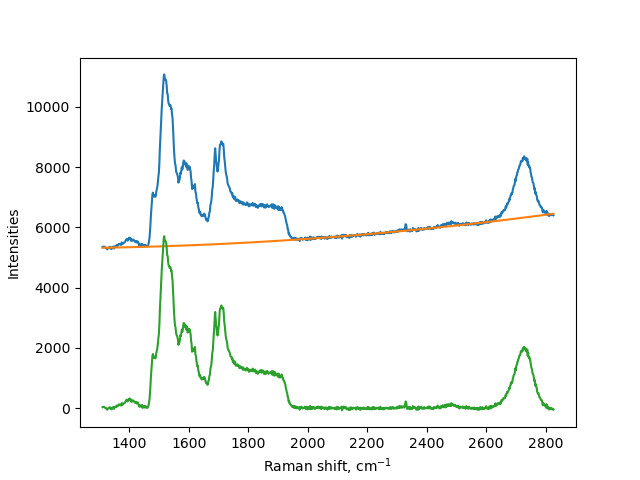

In [6]:
plt.figure()

# we plot the original signal
plt.plot(my_map.w, my_map.I[:,1])

# we plot the background
plt.plot(my_map.w, my_map.I_background[:,1])

# we plot the corrected spectra
plt.plot(my_map.w, my_map.I_corrected[:,1])

plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
plt.show()

# Normalisation of the signal to total area

<IPython.core.display.Javascript object>


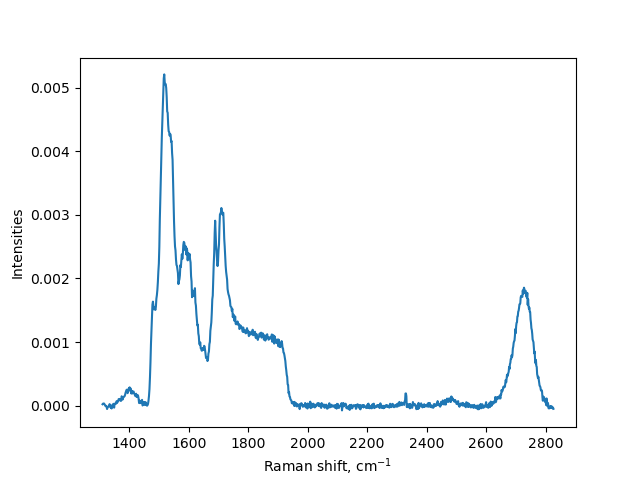

In [7]:
my_map.normalise(my_map.I_corrected, method = "area")

plt.figure()

# we plot the normalised spectra
plt.plot(my_map.w, my_map.I_normalised[:,1])

plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
plt.show()

# Calculate the centroid of the peak near 2700 cm-1

In [8]:
region_of_interest = np.array([[2600,2850]])
my_map.centroid(my_map.I_normalised, region_of_interest)
my_map.intensity(my_map.I_normalised*1000, region_of_interest)

<IPython.core.display.Javascript object>


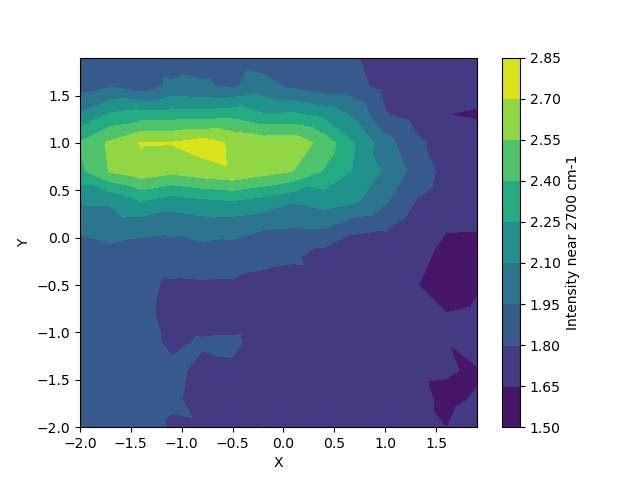

In [9]:
plt.figure()
plt.tricontourf(my_map.X, my_map.Y, my_map.I_max)
plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Intensity near 2700 cm-1")


# Calculate the ratio of the intensities of peak at 2700 and that at 1522 cm-1, and make a contour plot.

<IPython.core.display.Javascript object>


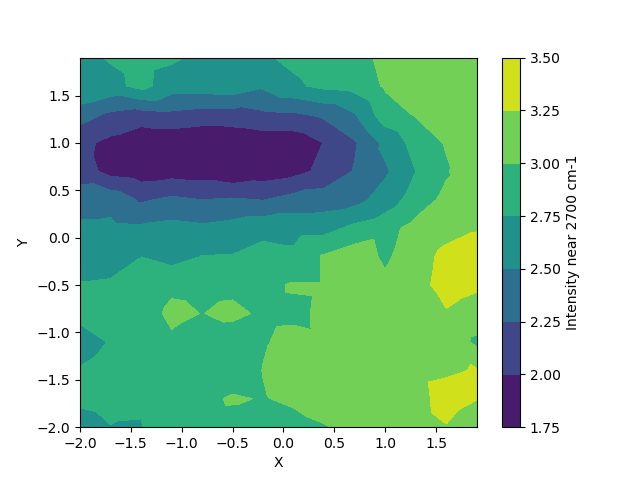

In [10]:
region_of_interest_for_ratio = np.array([[1500,1600],[2600,2850]])
my_map.intensity_ratio(my_map.I_normalised, region_of_interest_for_ratio)

plt.figure()
plt.tricontourf(my_map.X, my_map.Y, my_map.I_ratio)
plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Intensity near 2700 cm-1")


# Under development : peak fitting

<IPython.core.display.Javascript object>


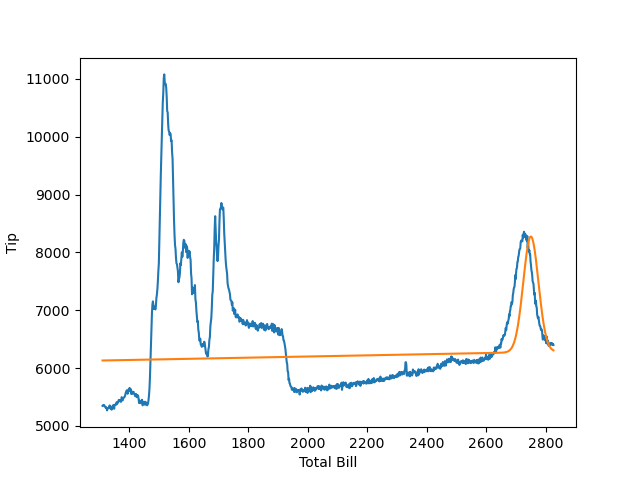

In [7]:
#one have to manualy estimate optimal fitting params:
#fitting range(here 0-200). Important is the vector range, not wavelength range
# aplitude, Xmean, sigma and background y0 and A(slope)

# create a simple Gaussian peak function
fun=peak_shapes.create_gauss() 

# parameters à priori of our peak
amp, Xmean, sigma, y0, A = 2000., 2750., 30., 6000., 0.1

# Plotting things
plt.figure()
plt.plot(Raman_shift, Raman_intensity[:,1])
plt.plot(Raman_shift, fun(Raman_shift, amp, Xmean, sigma, y0, A))
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [10]:
results, Rmap = maps.peak(X, Y, lambdas_one,intensities,'lorenz',[0,200],amp,Xmean,sigma,y0,A)

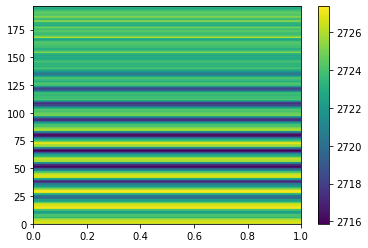

In [12]:
#while having maps in Rmap we can draw them


heatmap = plt.pcolor(Rmap[:,:,2])
plt.colorbar(heatmap)

In [14]:
results.shape

(197, 5)

In [19]:
Y.shape

(196,)